
Generate a figure showing heatmaps for a random and trained policy and a denoising auto-encoder.

Nb: To generate this figure, you require the raw data files (which are quite large) in the benchmarking folder.


In [21]:

import os
import numpy as np
import seaborn as sns
import scipy.io as sio

from matplotlib import pyplot as plt
from pylab import figure, cm
from matplotlib.colors import LogNorm

# Retrieve data
data_random = sio.loadmat(
    os.path.join('benchmarks', 'observations3_random_normalized.mat')
)['observations']
data_trained = sio.loadmat(
    os.path.join('benchmarks', 'observations_MID_fixed_direction.mat')
)['observations']
data_dae = sio.loadmat(
    os.path.join('benchmarks', 'aaron_dna12_mid_rollouts_data.mat')
)['observations'].squeeze()

# Keep the same number of points
n_pts = min([
    len(data_random),
    len(data_trained),
    len(data_dae)
])

data_random = data_random[:n_pts]
data_trained = data_trained[:n_pts]
data_dae = data_dae[:n_pts]


In [22]:

# Use position components
# data_random = data_random[:, [0, 1]]
# data_trained = data_trained[:, [0, 1]]
# data_dae = data_dae[:, [0, 1]]
# bins = np.linspace(-1.5, 1.5, 50)

# Slice out velocity components
data_random = data_random[:, [7, 8]]
data_trained = data_trained[:, [7, 8]]
data_dae = data_dae[:, [7, 8]]
bins = np.linspace(-.5, .5, 50)


In [23]:

# Convert to heatmaps
hm_random, _, _ = np.histogram2d(
    data_random[:, 0],
    data_random[:, 1],
    bins=bins
)

hm_trained, _, _ = np.histogram2d(
    data_trained[:, 0],
    data_trained[:, 1],
    bins=bins
)

hm_dae, _, _ = np.histogram2d(
    data_dae[:, 0],
    data_dae[:, 1],
    bins=bins
)


In [24]:

sns.set()
plt.set_cmap("RdPu")


<Figure size 432x288 with 0 Axes>

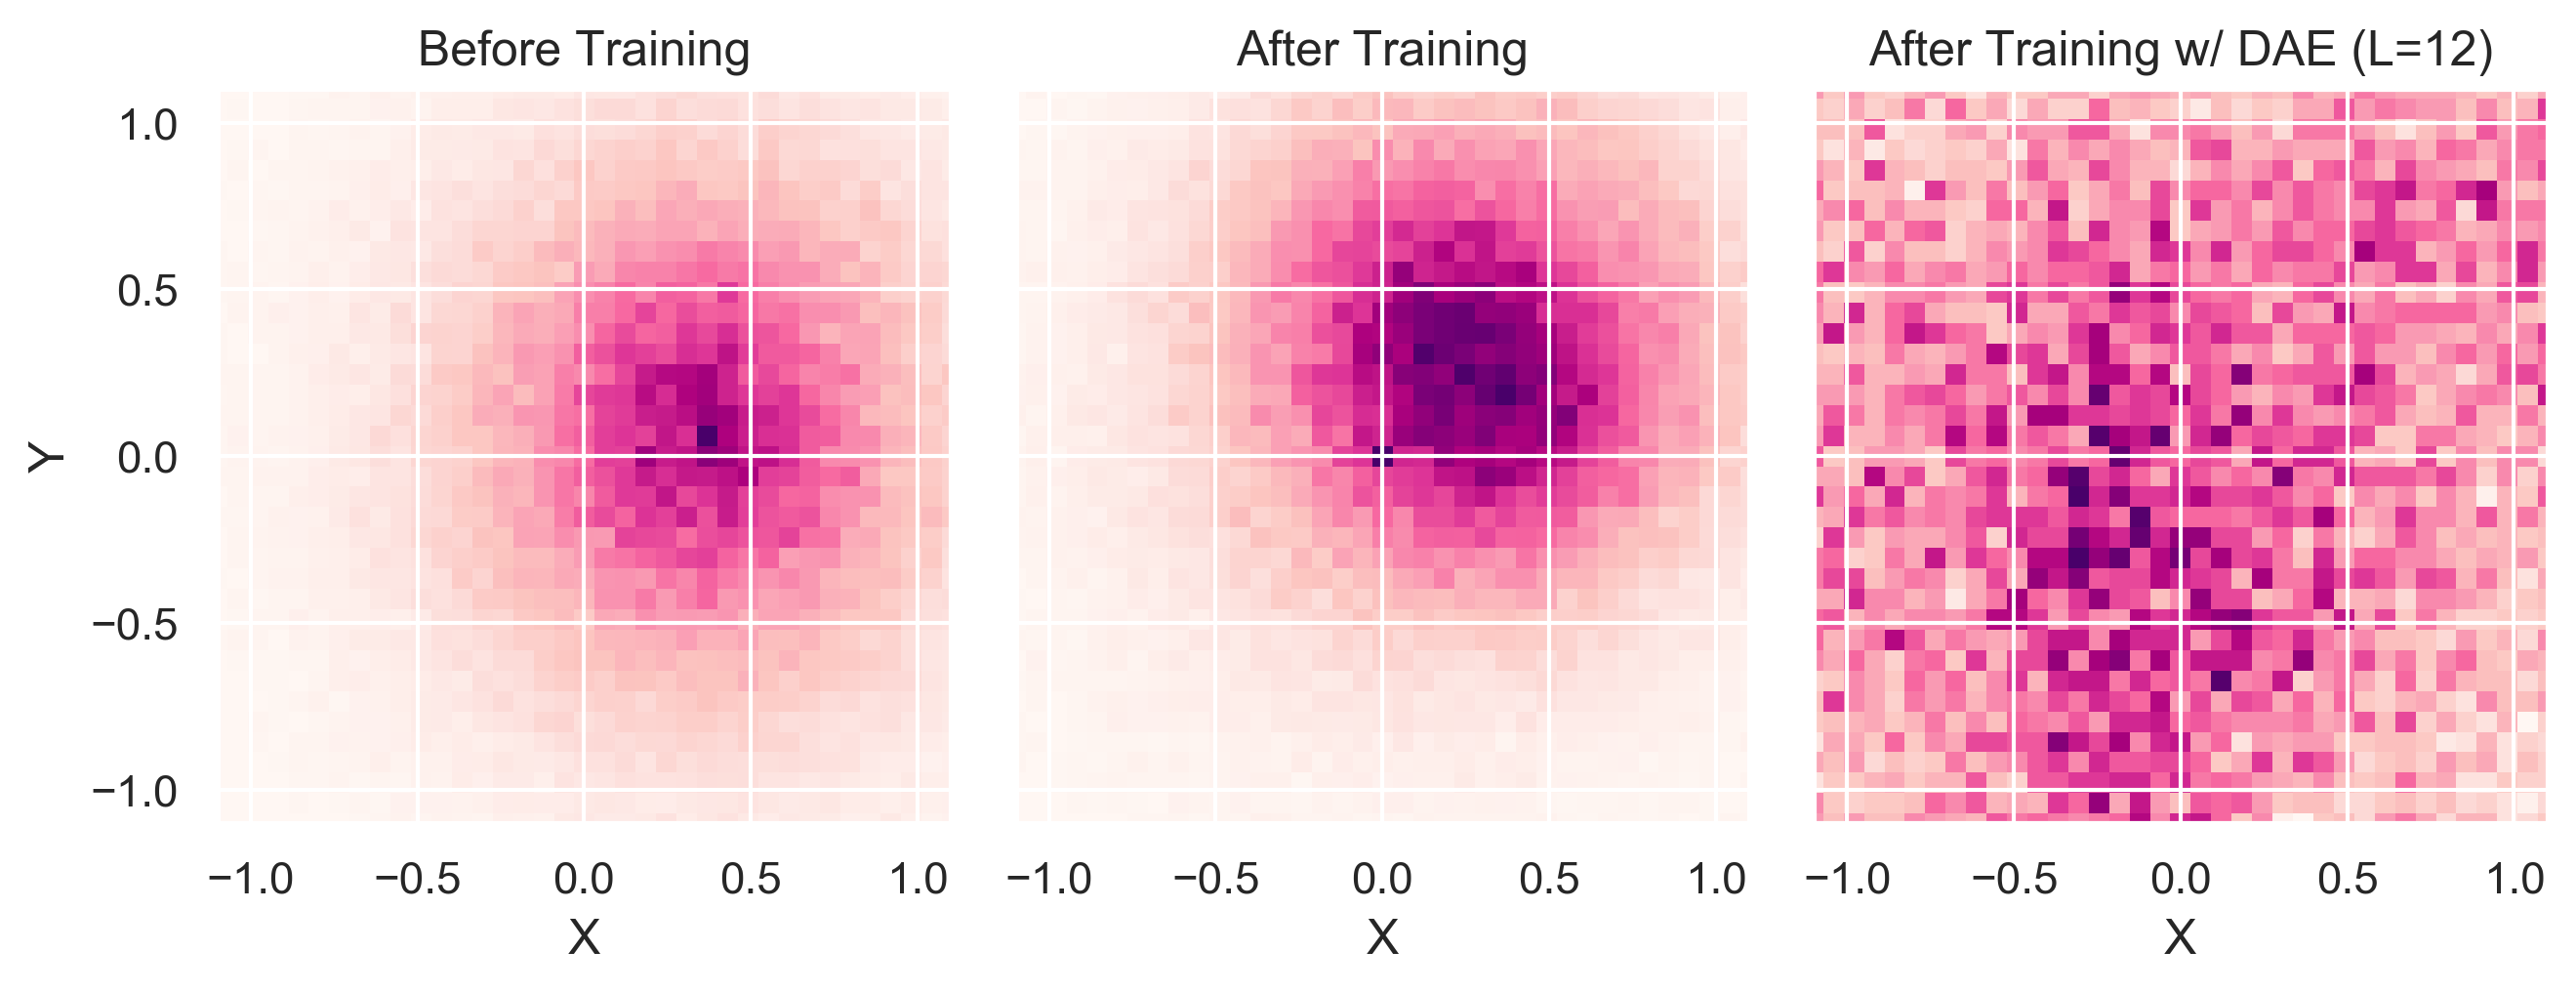

In [25]:

fig, axes = plt.subplots(
    1,
    3,
    sharey=True,
    figsize=(9, 6),
    dpi=300,
    #gridspec_kw=dict(wspace=0)
)

plt.sca(axes[0])
plt.imshow(
    hm_random.T,
    extent=(-1.5, 1.5, -1.5, 1.5),
    origin='lower'
)
plt.title("Before Training")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.yticks([-1.0, -0.5, 0, 0.5, 1.0])

plt.sca(axes[1])
plt.title("After Training")
plt.imshow(
    hm_trained.T,
    extent=(-1.5, 1.5, -1.5, 1.5),
    origin='lower'
)
plt.xlabel("X")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

plt.sca(axes[2])
plt.title("After Training w/ DAE (L=12)")
plt.imshow(
    hm_dae.T,
    extent=(-1.5, 1.5, -1.5, 1.5),
    origin='lower'
)
plt.xlabel("X")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

plt.tight_layout()
plt.savefig(
    os.path.join("manuscript", "figures", "fig-heatmap-dae.pdf"),
    dpi=300,
    bbox_inches='tight',
    pad_inches=0,
)
plt.show()
plt.close()



Heatmap of Jitterbug position during 100 episodes before and after training on the task *Move In Direction*, where the direction is fixed at 45 degrees.
